In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.svm import SVC
from statistics_helper import StatisticsHelper

#Load the data
full_employee_data: pd.DataFrame = pd.read_csv('full_employee_data_cleaned.csv')

#Prepare the data
target_column = 'Attrition'
#Replace 'target_column' with the actual name of the target column
X = full_employee_data.drop(target_column, axis=1)
y = full_employee_data[target_column]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.01, 0.1]
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Best Cross-Validation Score: 0.9611672995399111


'    #Make predictions\n    y_pred = svm_model.predict(X_test)\n    stats_helper = StatisticsHelper(X, y, svm_model, y_test, y_pred)\n    stats_helper.show_accuracy()\n    stats_helper.show_cross_val_score()\n    stats_helper.show_roc_auc_score()'

#### The parameters give above were chosen after some trial and error. C values below 1 and above 10 were insignificant or redundent. Gamma values below 0.01 would lead to minimal learning of the negatives and above 0.1 would lead to clear overfitting. Hence among the given values, the best model was found.

---- Accuracy ----
Accuracy: 0.981859410430839
------------------
---- ROC AUC Score ----
ROC AUC Score: 0.9490050822637609
------------------------
---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       741
         1.0       0.98      0.90      0.94       141

    accuracy                           0.98       882
   macro avg       0.98      0.95      0.97       882
weighted avg       0.98      0.98      0.98       882

-------------------------------


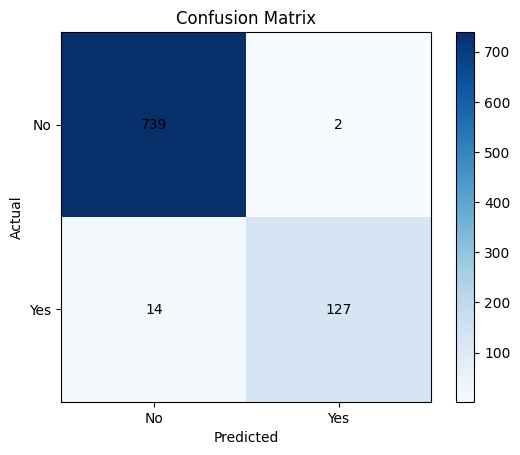

--- Cross Validation Scores ---
Cross-validated scores: [0.99092971 0.98979592 0.98639456 0.99206349 0.98752834]
Mean accuracy: 0.9893424036281179
Standard deviation: 0.002102861336847111
-------------------------------


In [34]:
svm_model = grid_search.best_estimator_
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

stats_helper = StatisticsHelper(X, y, svm_model, y_test, y_pred)
stats_helper.show_all(is_regression=False)